<a href="https://colab.research.google.com/github/yuyangweng/Deep_Learning_Ittraining/blob/main/CNN%E5%AF%A6%E4%BD%9C%E5%9C%96%E5%83%8F%E5%88%86%E9%A1%9E%E5%95%8F%E9%A1%8C_%E4%BD%BF%E7%94%A8Keras_CNN%E5%9F%BA%E7%A4%8E_v0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#加入Convolution Layer

##Conv+padding=same

In [2]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
#建立CNN model
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',
         ######padding######
         #若沒有指定為same，預設值為valid，也就是會讓Conv後的feature map size變小
         padding='same',
         ######padding######
       )
)
#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())
#建立隱藏層（此例中此隱藏層只有1個神經元）
#可以寫得較完整：model.add(layers.Dense(units=1))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10))
#最佳化設定


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 33s 4ms/step - loss: 2.4190 - accuracy: 0.2082 - val_loss: 2.2231 - val_accuracy: 0.2262
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 3)         30        
_________________________________________________________________
flatten_1 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                23530     
Total params: 23,560
Trainable params: 23,560
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - loss: 2.2275 - accuracy: 0.2211
test_loss=2.2275147438049316
test_accuracy=0.22110000252723694


##strides

In [3]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
#建立CNN model
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',
         #若沒有指定為same，預設值為valid，也就是會讓Conv後的feature map size變小
         padding='same',
         ######strides######
         strides=2,
         ######strides######
       )
)
#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())
#建立隱藏層（此例中此隱藏層只有1個神經元）
#可以寫得較完整：model.add(layers.Dense(units=1))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10))
#最佳化設定


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 6s 3ms/step - loss: 2.7409 - accuracy: 0.2059 - val_loss: 2.3072 - val_accuracy: 0.2507
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 3)         30        
_________________________________________________________________
flatten_2 (Flatten)          (None, 588)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5890      
Total params: 5,920
Trainable params: 5,920
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 2.3097 - accuracy: 0.2161
test_loss=2.309720277786255
test_accuracy=0.21610000729560852




---



#加入特殊的Layer

##加入Add layer（用Functional Model）

In [4]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import layers
#建立輸入層
from tensorflow.keras.layers import Input
input_layer = Input(shape=(28,28))
from tensorflow.keras.layers import Dense, Flatten
x = Flatten()(input_layer)

######加入Add layer（用Functional Model）######
from tensorflow.keras.layers import Add
x = Add()([x, x])
######加入Add layer（用Functional Model）######

output_layer = Dense(units=10)(x)
#建立整個模型（指定輸入、輸出）
from tensorflow.keras.models import Model
model = Model(inputs=input_layer, outputs=output_layer)

#最佳化設定
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)
model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 6s 3ms/step - loss: 3.1190 - accuracy: 0.1576 - val_loss: 2.3141 - val_accuracy: 0.1575
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 784)          0           input_2[0][0]                    
__________________________________________________________________________________________________
add (Add)                       (None, 784)          0           flatten_3[0][0]                  
                                                                 flatten_3[0][0]                  
__

##加入Multiply layer（用Functional Model）

In [5]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
#建立輸入層
from tensorflow.keras.layers import Input
input_layer = Input(shape=(28,28))
from tensorflow.keras.layers import Dense, Flatten
x = Flatten()(input_layer)

######加入Multiply layer（用Functional Model）######
from tensorflow.keras.layers import Multiply
x = Multiply()([x, x])
######加入Multiply layer（用Functional Model）######

output_layer = Dense(units=10)(x)
#建立整個模型（指定輸入、輸出）
from tensorflow.keras.models import Model
model = Model(inputs=input_layer, outputs=output_layer)

#最佳化設定
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)
model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 5s 3ms/step - loss: 11.4191 - accuracy: 0.1128 - val_loss: 12.8023 - val_accuracy: 0.1203
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 784)          0           input_3[0][0]                    
__________________________________________________________________________________________________
multiply (Multiply)             (None, 784)          0           flatten_4[0][0]                  
                                                                 flatten_4[0][0]                  


##加入Concatenate layer（用Functional Model）

In [6]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
#建立輸入層
from tensorflow.keras.layers import Input
input_layer = Input(shape=(28,28,1))

from tensorflow.keras.layers import Conv2D
x = Conv2D(filters=3, 
      kernel_size=(3,3),
      activation='relu',
      ######加入Concatenate layer（用Functional Model）（1/2）######
      #利用padding = same這個技巧來達到可以直接將輸出和input_layer相加的結果
      padding = 'same',
      ######加入Concatenate layer（用Functional Model）（1/2）######
    )(input_layer)

######加入Concatenate layer（用Functional Model）（2/2）######
from tensorflow.keras.layers import concatenate
x = concatenate([x, input_layer])
######加入Concatenate layer（用Functional Model）（2/2）######

from tensorflow.keras.layers import Dense, Flatten
x = Flatten()(x)
output_layer = Dense(units=10)(x)
#建立整個模型（指定輸入、輸出）
from tensorflow.keras.models import Model
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)
model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 7s 4ms/step - loss: 2.8078 - accuracy: 0.1799 - val_loss: 2.2915 - val_accuracy: 0.1920
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 3)    30          input_4[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 28, 4)    0           conv2d_2[0][0]                   
                                                                 input_4[0][0]                    
__

##加入GaussianNoise Layer

In [7]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
#建立CNN model
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
from keras.layers import Conv2D, MaxPooling2D
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)

######加入GaussianNoise Layer######
from tensorflow.keras.layers import GaussianNoise
model.add(GaussianNoise(0.1))
######加入GaussianNoise Layer######

model.add(layers.Flatten())
model.add(layers.Dense(units=10))
#最佳化設定
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)
model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 6s 4ms/step - loss: 2.5832 - accuracy: 0.3827 - val_loss: 2.2542 - val_accuracy: 0.3863
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 26, 26, 3)         30        
_________________________________________________________________
gaussian_noise (GaussianNois (None, 26, 26, 3)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2028)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                20290     
Total params: 20,320
Trainable params: 20,320
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - lo

##加入GlobalAveragePooling2D Layer

In [8]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)

######加入GlobalAveragePooling2D Layer######
from tensorflow.keras.layers import GlobalAveragePooling2D
model.add(GlobalAveragePooling2D())
######加入GlobalAveragePooling2D Layer######

model.add(layers.Flatten())
model.add(layers.Dense(units=10))
#最佳化設定
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)
model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 7s 4ms/step - loss: 13.6082 - accuracy: 0.0995 - val_loss: 13.6521 - val_accuracy: 0.0960
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
global_average_pooling2d (Gl (None, 3)                 0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                40        
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 13

##加入UpSampling2D Layer

In [9]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)

######加入UpSampling2D Layer######
from tensorflow.keras.layers import UpSampling2D
model.add(UpSampling2D())
######加入UpSampling2D Layer######

model.add(layers.Flatten())
model.add(layers.Dense(units=10))
#最佳化設定
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)
model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 7s 4ms/step - loss: 2.5675 - accuracy: 0.0565 - val_loss: 2.3026 - val_accuracy: 0.0578
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 52, 52, 3)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8112)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                81130     
Total params: 81,160
Trainable params: 81,160
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - lo

##加入自訂 layer（用Functional Model）

In [10]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
#建立輸入層
from tensorflow.keras.layers import Input
input_layer = Input(shape=(28,28))
from tensorflow.keras.layers import Dense, Flatten
x = Flatten()(input_layer)

######加入自訂 layer（用Functional Model）######
from keras.engine.topology import Layer
from tensorflow.keras import backend as K
#自訂Layer（此例為開根號）
class Sqrt(Layer):
    def __init__(self, **kwargs):
        super(Sqrt, self).__init__(**kwargs)
    def build(self, input_shape):
        super(Sqrt, self).build(input_shape)
    def call(self, x):
        #x是一個[x]的型態，所以需用[0]取出值來
        x = K.sqrt(x[0])
        return x 
    def compute_output_shape(self, input_shape):
        return input_shape

x = Sqrt()([x])
######加入自訂 layer（用Functional Model）######

output_layer = Dense(units=10)(x)
#建立整個模型（指定輸入、輸出）
from tensorflow.keras.models import Model
model = Model(inputs=input_layer, outputs=output_layer)


#最佳化設定
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)
model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 6s 3ms/step - loss: 2.4234 - accuracy: 0.2604 - val_loss: 2.2941 - val_accuracy: 0.2703
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
tf.math.maximum_1 (TFOpLambd (None, 784)               0         
_________________________________________________________________
tf.math.sqrt_1 (TFOpLambda)  (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0




---



# 獨立的Activation Function Layer

## LeakyReLU Layer

In [11]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)
######LeakyReLU######
from keras.layers.advanced_activations import LeakyReLU
model.add(LeakyReLU(alpha=0.01))
######LeakyReLU######
#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())
#建立隱藏層（此例中此隱藏層只有1個神經元）
#可以寫得較完整：model.add(layers.Dense(units=1))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10))
#最佳化設定
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)
model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3677 - accuracy: 0.2116 - val_loss: 2.3022 - val_accuracy: 0.2155
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 26, 26, 3)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2028)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                20290     
Total params: 20,320
Trainable params: 20,320
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - lo

## PReLU Layer

In [12]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)
######PReLU######
from keras.layers.advanced_activations import PReLU
model.add(PReLU())
######PReLU######
#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())
#建立隱藏層（此例中此隱藏層只有1個神經元）
#可以寫得較完整：model.add(layers.Dense(units=1))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10))
#最佳化設定


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 7s 4ms/step - loss: 2.4842 - accuracy: 0.1673 - val_loss: 2.3022 - val_accuracy: 0.1625
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 26, 26, 3)         2028      
_________________________________________________________________
flatten_11 (Flatten)         (None, 2028)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                20290     
Total params: 22,348
Trainable params: 22,348
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - lo

## ReLU Layer

In [13]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)
######ReLU######
from tensorflow.keras.layers import Activation
model.add(Activation('relu'))
######ReLU######
#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())
#建立隱藏層（此例中此隱藏層只有1個神經元）
#可以寫得較完整：model.add(layers.Dense(units=1))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10))
#最佳化設定


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3891 - accuracy: 0.1084 - val_loss: 2.2941 - val_accuracy: 0.1053
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 3)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2028)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20290     
Total params: 20,320
Trainable params: 20,320
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - lo

## Sigmoid Layer

In [14]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)
######Sigmoid######
from tensorflow.keras.layers import Activation
model.add(Activation('sigmoid'))
######Sigmoid######
#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())
#建立隱藏層（此例中此隱藏層只有1個神經元）
#可以寫得較完整：model.add(layers.Dense(units=1))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10))
#最佳化設定


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3402 - accuracy: 0.1051 - val_loss: 2.3026 - val_accuracy: 0.1045
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 3)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2028)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                20290     
Total params: 20,320
Trainable params: 20,320
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - lo

## Softmax Layer

In [15]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)
######Softmax######
from tensorflow.keras.layers import Activation
model.add(Activation('softmax'))
######Softmax######
#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())
#建立隱藏層（此例中此隱藏層只有1個神經元）
#可以寫得較完整：model.add(layers.Dense(units=1))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10))
#最佳化設定


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 7s 4ms/step - loss: 10.5733 - accuracy: 0.1191 - val_loss: 10.5046 - val_accuracy: 0.0952
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 3)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 2028)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                20290     
Total params: 20,320
Trainable params: 20,320
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - 



---



## Tanh Layer

In [16]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)
######Tanh######
from tensorflow.keras.layers import Activation
model.add(Activation('tanh'))
######Tanh######
#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())
#建立隱藏層（此例中此隱藏層只有1個神經元）
#可以寫得較完整：model.add(layers.Dense(units=1))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10))
#最佳化設定


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3167 - accuracy: 0.2250 - val_loss: 2.3026 - val_accuracy: 0.2220
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 3)         30        
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 3)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 2028)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                20290     
Total params: 20,320
Trainable params: 20,320
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - l



---



#最佳化法（optimizer）

##使用Momentum

In [17]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)

#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation='relu'))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10,activation='softmax'))

#最佳化設定


######使用Momentum######
#舊版寫法model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', momentum=0.9, metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=tensorflow.keras.optimizers.SGD(momentum=0.9), metrics=['accuracy'])
######使用Momentum######
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 7s 4ms/step - loss: 2.3787 - accuracy: 0.1128 - val_loss: 2.3026 - val_accuracy: 0.1050
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 3)         30        
_________________________________________________________________
flatten_16 (Flatten)         (None, 2028)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               259712    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 261,032
Trainable params: 261,032
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step -

##使用NAG

In [18]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)

#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation='relu'))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10,activation='softmax'))

#最佳化設定


######使用NAG######
#舊版寫法：
#model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', nesterov=True, metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=tensorflow.keras.optimizers.SGD(nesterov=True), metrics=['accuracy'])
######使用NAG######
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3439 - accuracy: 0.1141 - val_loss: 2.3020 - val_accuracy: 0.1050
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 3)         30        
_________________________________________________________________
flatten_17 (Flatten)         (None, 2028)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               259712    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 261,032
Trainable params: 261,032
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step -

##使用SGD+設定Learning Rate

In [19]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)

#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation='relu'))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10,activation='softmax'))

#最佳化設定


######使用SGD+設定Learning Rate######
#舊版寫法model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', momentum=0.9, metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=tensorflow.keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])
######使用SGD+設定Learning Rate######
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1688/1688 [==============================] - 7s 4ms/step - loss: 2.3762 - accuracy: 0.1125 - val_loss: 2.3019 - val_accuracy: 0.1050
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 3)         30        
_________________________________________________________________
flatten_18 (Flatten)         (None, 2028)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               259712    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 261,032
Trainable params: 261,032
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - loss: 2.3011 - accuracy: 0.1135
test_loss=2.30106472969



---



#調整Learning Rate

##根據epoch數自訂Learning Rate調整機制

In [20]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()

#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)


#建立CNN model
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28

model.add(    
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)
#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())

model.add(layers.Dense(units=128,activation='relu'))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10,activation='softmax'))

#最佳化設定


#舊版寫法model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', momentum=0.9, metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

######自訂的Learning Rate調整機制（1/2）######
def lr_schedule(epoch):
    lr =1e-3
    if epoch >4:
            lr *=0.5e-3
    elif epoch >3:
            lr *=1e-3
    elif epoch >2:
            lr *=1e-2
    elif epoch >1:
            lr *=1e-1
    print(f'********Learning rate: {lr}  ********')
    return lr

from tensorflow.keras.callbacks import LearningRateScheduler
lr_scheduler = LearningRateScheduler(lr_schedule)
callback_list =[lr_scheduler]

######自訂的Learning Rate調整機制（1/2）######
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    verbose=2,
    validation_split=0.1,
    ######自訂的Learning Rate調整機制（2/2）######
    #ReduceLROnPlateau機制不會在第1個epoch就調整learning rate
    epochs=30,
    callbacks=callback_list,
    ######自訂的Learning Rate調整機制（2/2）######
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
Epoch 1/30
********Learning rate: 0.001  ********
1688/1688 - 5s - loss: 0.5423 - accuracy: 0.8928 - val_loss: 0.1325 - val_accuracy: 0.9622
Epoch 2/30
********Learning rate: 0.001  ********
1688/1688 - 5s - loss: 0.1141 - accuracy: 0.9659 - val_loss: 0.1375 - val_accuracy: 0.9630
Epoch 3/30
********Learning rate: 0.0001  ********
1688/1688 - 5s - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.1043 - val_accuracy: 0.9748
Epoch 4/30
********Learning rate: 1e-05  ********
1688/1688 - 5s - loss: 0.0198 - accuracy: 0.9945 - val_loss: 0.1037 - val_accuracy: 0.9753
Epoch 5/30
********Learning rate: 1e-06  ********
1688/1688 - 5s - loss: 0.0180 - accuracy: 0.9952 - val_loss: 0.1036 - val_accuracy: 0.9752
Epoch 6/30
********Learning rate: 5e-07  ********
1688/1688 - 5s - loss: 0.0178 - accuracy: 0.9953 - val_loss: 0.1035 - val_accuracy: 0.9752
Epoch 7/30
********Learning rate: 5e-07  ********
1688/1688 - 5s - loss: 0.0177 - accuracy: 0.995

# 避免Overfitting

##Dropout

In [21]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    Conv2D(filters=3, 
         kernel_size=(3,3),
         activation='relu',         
       )
)
######Dropout######
from keras.layers.core import Dropout
#設定要丟棄多少%的神經元
p_drop =0.5
model.add(Dropout(p_drop))
######Dropout######
#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())
#建立隱藏層（此例中此隱藏層只有1個神經元）
#可以寫得較完整：model.add(layers.Dense(units=1))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10))
#最佳化設定


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#開始進行training
model.fit(
    x=X_train,
    y=y_train,
    epochs=1,
    verbose=1,
    validation_split=0.1
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
1688/1688 [==============================] - 6s 4ms/step - loss: 2.5343 - accuracy: 0.0948 - val_loss: 2.3026 - val_accuracy: 0.0960
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 3)         30        
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 26, 26, 3)         0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 2028)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                20290     
Total params: 20,320
Trainable params: 20,320
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - l



---



##使用EarlyStopping機制

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
Epoch 1/20
1688/1688 [==============================] - 11s 6ms/step - loss: 1.0656 - accuracy: 0.9208 - val_loss: 0.1289 - val_accuracy: 0.9648
Epoch 2/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0916 - accuracy: 0.9733 - val_loss: 0.1044 - val_accuracy: 0.9703
Epoch 3/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.1111 - val_accuracy: 0.9725
Epoch 4/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.1125 - val_accuracy: 0.9753
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.1411 - val_accuracy: 0.9727
Epoch 6/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0252 - accuracy: 0.9928 - val_loss: 0.0992 - val_accuracy: 0.9787
Epoch 7/20
1688/1688 [==============================] - 10s 6ms/step - los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:99: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:108: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


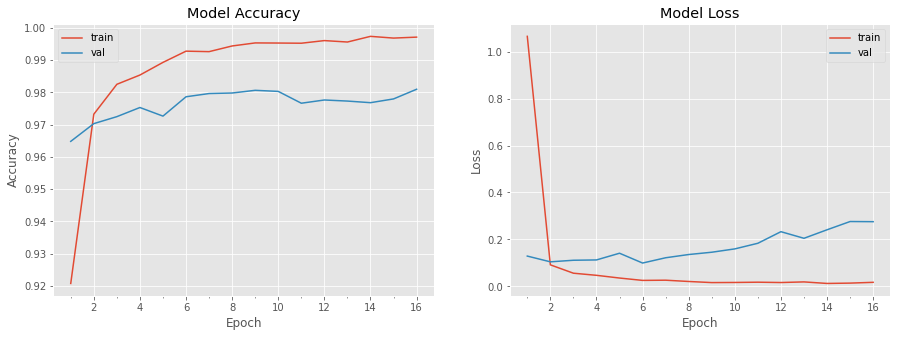

In [22]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    ######使用EarlyStopping機制（1/6）######
    #此例中若Conv2D若filter數太小，則此模型無學習能力的話，EarlyStopping也無意義
    Conv2D(filters=53, 
         kernel_size=(3,3),
         activation='relu',         
       )
    ######使用EarlyStopping機制（1/6）######
)
#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())

######使用EarlyStopping機制（2/6）######
#建立隱藏層（此例中此隱藏層只有1個神經元）
#此例中若此模型無學習能力的話，EarlyStopping也無意義
model.add(layers.Dense(units=128,activation='relu'))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10,activation='softmax'))
######使用EarlyStopping機制（2/6）######

#最佳化設定


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

######使用EarlyStopping機制（3/6）######
# 開始設定EarlyStopping機制的參數
from tensorflow.keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(min_delta=0.001, patience=10)
######使用EarlyStopping機制（3/6）######

#開始進行training
######使用EarlyStopping機制（4/6）######
#需儲存model training過程
model_details = model.fit(
######使用EarlyStopping機制（4/6）######    
    x=X_train,
    y=y_train,
    verbose=1,
    validation_split=0.1,
    ######使用EarlyStopping機制（5/6）######
    #若只有1個epoch，無法看出EarlyStopping有任何的效用
    epochs=20,
    callbacks=[early_stopper],
    ######使用EarlyStopping機制（5/6）######
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

######使用EarlyStopping機制（6/6）######
#開始繪圖觀察training過程
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

def plot_model(model_details):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    #accuracy
    axs[0].plot(range(1,len(model_details.history['accuracy'])+1),model_details.history['accuracy'])
    axs[0].plot(range(1,len(model_details.history['val_accuracy'])+1),model_details.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['accuracy'])+1),len(model_details.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    #loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
        
    plt.show()

plot_model(model_details)
######使用EarlyStopping機制（6/6）######

##不使用EarlyStopping機制（與上個範例作對比用）

Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
Epoch 1/20
1688/1688 [==============================] - 11s 6ms/step - loss: 1.0227 - accuracy: 0.9249 - val_loss: 0.1179 - val_accuracy: 0.9705
Epoch 2/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0884 - accuracy: 0.9746 - val_loss: 0.1050 - val_accuracy: 0.9718
Epoch 3/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0571 - accuracy: 0.9838 - val_loss: 0.0927 - val_accuracy: 0.9757
Epoch 4/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0441 - accuracy: 0.9868 - val_loss: 0.1074 - val_accuracy: 0.9765
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0375 - accuracy: 0.9892 - val_loss: 0.1238 - val_accuracy: 0.9750
Epoch 6/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0261 - accuracy: 0.9924 - val_loss: 0.1319 - val_accuracy: 0.9777
Epoch 7/20
1688/1688 [==============================] - 10s 6ms/step - los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


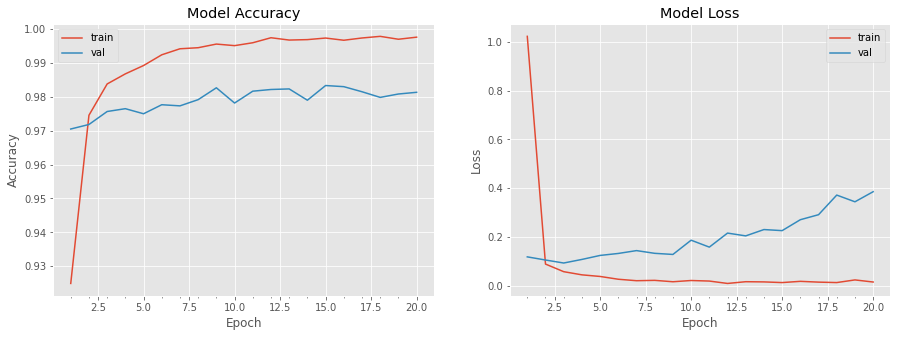

In [23]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
#開始進行前處理
#使用Conv2D須將整數uint8（0~255）轉為float32
#否則在keras 2.4.3版會出錯：
#TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

img_rows, img_cols = (28,28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#建立CNN model
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D
img_rows, img_cols =28,28
model.add(
    ######使用EarlyStopping機制（1/6）######
    #此例中若Conv2D若filter數太小，則此模型無學習能力的話，EarlyStopping也無意義
    Conv2D(filters=53, 
         kernel_size=(3,3),
         activation='relu',         
       )
    ######使用EarlyStopping機制（1/6）######
)
#此例若沒加Flatten Layer則會出錯（dense_數字，此數字後面會變動，其餘都一樣）：
model.add(layers.Flatten())

######使用EarlyStopping機制（2/6）######
#建立隱藏層（此例中此隱藏層只有1個神經元）
#此例中若此模型無學習能力的話，EarlyStopping也無意義
model.add(layers.Dense(units=128,activation='relu'))
#建立輸出層（輸出神經元=10）
model.add(layers.Dense(units=10,activation='softmax'))
######使用EarlyStopping機制（2/6）######

#最佳化設定


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

######使用EarlyStopping機制（3/6）######
# 開始設定EarlyStopping機制的參數
from tensorflow.keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(min_delta=0.001, patience=10)
######使用EarlyStopping機制（3/6）######

#開始進行training
######使用EarlyStopping機制（4/6）######
#需儲存model training過程
model_details = model.fit(
######使用EarlyStopping機制（4/6）######    
    x=X_train,
    y=y_train,
    verbose=1,
    validation_split=0.1,
    ######使用EarlyStopping機制（5/6）######
    #若只有1個epoch，無法看出EarlyStopping有任何的效用
    epochs=20,
    #callbacks=[early_stopper],
    ######使用EarlyStopping機制（5/6）######
)


model.summary()
#開始進行testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

######使用EarlyStopping機制（6/6）######
#開始繪圖觀察training過程
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

def plot_model(model_details):
    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['accuracy'])+1),model_details.history['accuracy'])
    axs[0].plot(range(1,len(model_details.history['val_accuracy'])+1),model_details.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['accuracy'])+1),len(model_details.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
        
    plt.show()

plot_model(model_details)
#發現果然使用EarlyStopping效果好一些：有使用的0.9755>沒使用的0.9748（易Overfitting）
######使用EarlyStopping機制（6/6）######